In [1]:
! which python

/Users/marek/Documents/school/masters/vysledky/venv/bin/python


# Summary of results
and analysis

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [107]:
def are_equal_steps(column):
    size = len(column)
    for i in range(size):
        for j in range(size):
            column[i].sort()
            column[j].sort()
            if column[i] != column[j]:
                return False
    return True

In [218]:
def create_frame(df, title, name,isLoss: str =False,):
    data = df.copy()
    if not are_equal_steps(data.x):
        print("Set has different steps")
        return
    
    steps = pd.DataFrame(data.x[0],columns=["step"])
    
    data = data[['y','name']].transpose()
    data = data.rename(columns=data.iloc[1])
    data = data.iloc[:1]
    data = data.apply(lambda x: x.explode(),axis=0).reset_index(drop=True)
    data = pd.concat([steps,data],axis=1)
    
    new_cols = [re.sub(r'[^0-9]*(\d+).*', r'\g<1>', i) for i in data.columns]
    mapping = {i:j for i,j in zip(data.columns, new_cols)}
    data = data.rename(columns=mapping)
    
    data = data[data.iloc[-1].sort_values(ascending=False).index] # order 

    fig, axs = plt.subplots(figsize=(10,10), tight_layout=True)        # Create an empty matplotlib Figure and Axes
    data.plot.line(x='step',ax=axs)                  # Use pandas to put the area plot on the prepared Figure/Axes
    
    ylabel = "BLEU"
    if isLoss:
        ylabel = "Loss"
        
    axs.set_ylabel(ylabel) 
    
    axs.set_xlabel('step')
    axs.set_title(title)
    fig.tight_layout()
    fig.savefig(name,bbox_inches='tight',facecolor='white', transparent=False)
    
    return data

In [219]:
df = pd.read_json("tradeoff_train-tune_v2.json",orient="values")

In [220]:
train = df.iloc[:1].reset_index(drop=True)
tune = df.iloc[1:].reset_index(drop=True)

In [221]:
import re
[re.sub(r'.*-([1-90]{2})([0]{1}).*', r'\g<1>', i) for i in tune.columns]

['x', 'y', 'type', 'name']

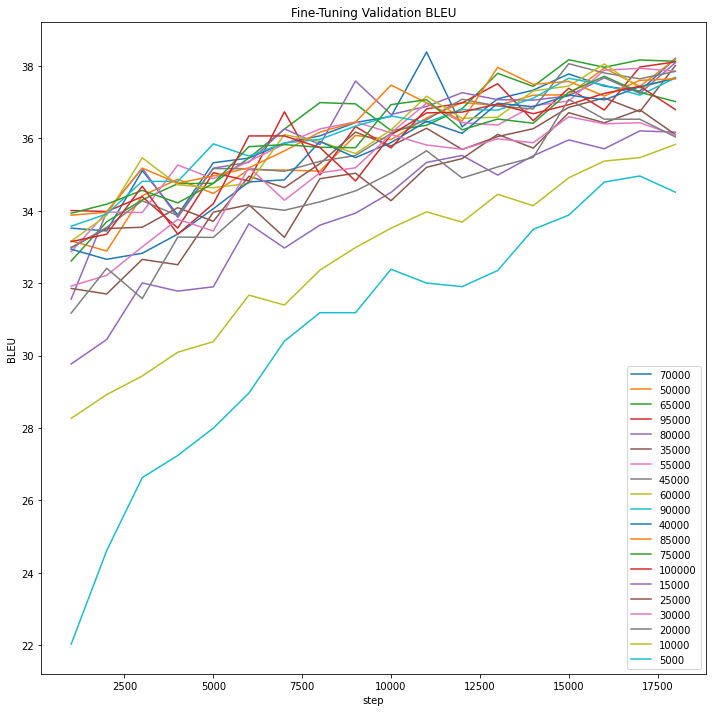

In [222]:
tune = create_frame(tune,"Fine-Tuning Validation BLEU",'tradeoff_FT_bleu.png')

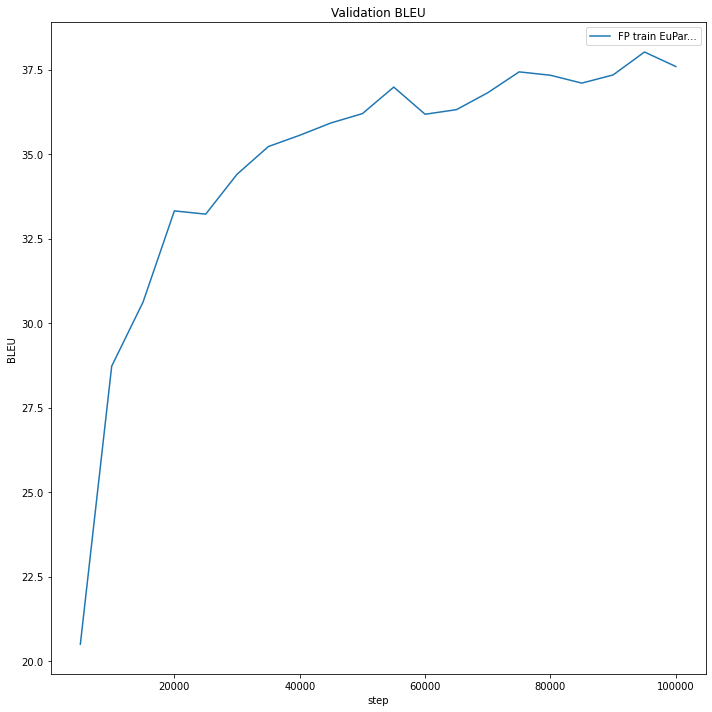

In [223]:
train = create_frame(train,"Validation BLEU",'tradeoff_train_val_bleu.png')

## Analysis of rank - Is resulting BLEU dependant on starting step? (should be)

<AxesSubplot:xlabel='model', ylabel='last'>

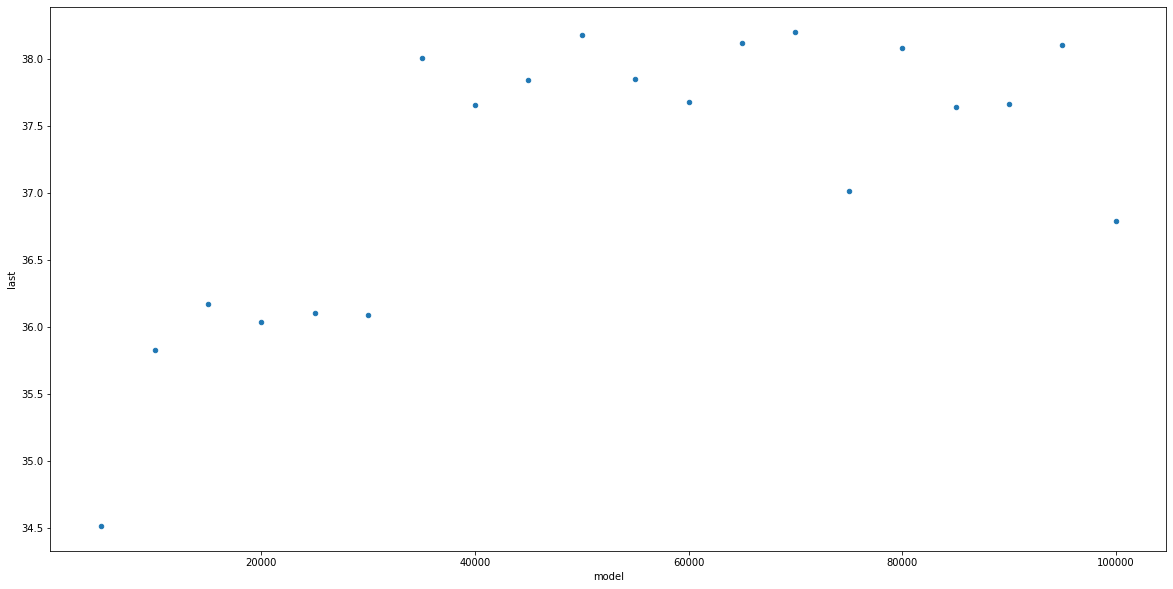

In [224]:
last = tune.iloc[-1:,:].transpose()
# last.index.name = "model"
last = last.reset_index()
last = last.set_axis(['model','last'],axis=1)[1:]
last.model = last.model.astype("int")
last.sort_values(by="model",ascending=True).plot.scatter(x="model",y="last",figsize=(20,10))

In [225]:
last

,model,last
1,70000,38.2058
2,50000,38.1863
3,65000,38.1261
4,95000,38.1106
5,80000,38.0877
6,35000,38.0071
7,55000,37.8523
8,45000,37.8477
9,60000,37.6797
10,90000,37.6651


In [226]:
trans = tune.transpose()
trans = trans.iloc[1:]
new = pd.DataFrame()
new['last'] = trans.iloc[:,-1:]
# trans['max'] = 
new['max'] = trans.max(axis=1)
new['last_order'] = new['last'].rank(axis=0,method='average')
new['max_order'] = new['max'].rank(axis=0,method='average')
new

,last,max,last_order,max_order
70000,38.2058,38.3818,20.0,20.0
50000,38.1863,38.1863,19.0,19.0
65000,38.1261,38.1686,18.0,18.0
95000,38.1106,38.1106,17.0,17.0
80000,38.0877,38.0877,16.0,16.0
35000,38.0071,38.0071,15.0,13.0
55000,37.8523,37.9313,14.0,11.0
45000,37.8477,38.0582,13.0,15.0
60000,37.6797,38.0511,12.0,14.0
90000,37.6651,37.6651,11.0,9.0


# Out-of-Domain analysis

In [227]:
df = pd.read_json("tradeoff_in_out_of_domain_robustness_chart_data.json",orient="values")

In [228]:
train = df.iloc[:1].reset_index(drop=True)
tune = df.iloc[1:].reset_index(drop=True)

In [229]:
tune = tune[tune.name.str.contains('OpenSubs')].reset_index(drop=True)
tune

,x,y,type,name
0,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.2903, 6.2575, 6.6443, 7.2797, 7.1242, 7.593...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
1,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[4.7382, 4.2563, 5.3015, 5.7228, 6.8726, 6.621...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
2,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[6.5562000000000005, 6.1637, 5.043, 7.3669, 6....",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
3,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.0257, 7.1114, 7.6541, 7.2003, 7.471, 7.9901...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
4,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.2329, 6.0669, 6.7681000000000004, 8.0338, 8...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
5,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.7958, 6.8705, 6.7437000000000005, 7.4594000...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
6,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.2071, 7.8258, 7.1281, 8.8165, 8.5471, 8.911...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
7,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.4396, 8.4641, 8.1851, 8.0128, 8.0122, 7.865...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
8,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.1015, 8.4809, 7.2852, 8.411, 9.2077, 7.3147...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...
9,"[1000, 2000, 3000, 4000, 5000, 6000, 7000, 800...","[7.6455, 7.7478, 7.7878, 8.532, 8.558, 8.5895,...",scattergl,trainEuParlFP_fineTuneEuParlQAT_OpenSubs_eval_...


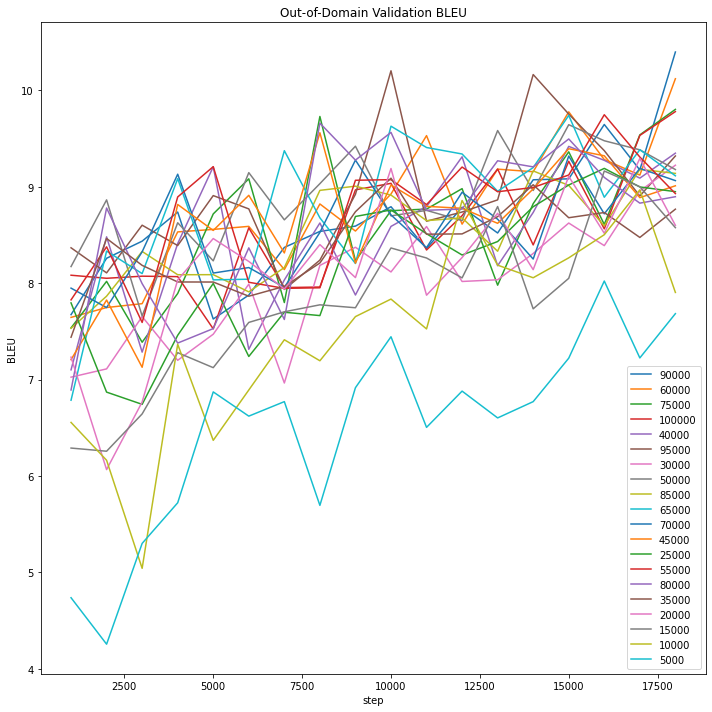

In [230]:
tune = create_frame(tune, "Out-of-Domain Validation BLEU","out-ft_eval_bleu.png")

## Infinite training

Domain - EuroParl https://huggingface.co/datasets/europarl_bilingual

Out-of-Domain = OpenSubtitles https://huggingface.co/datasets/open_subtitles

In [231]:
df = pd.read_json("infiniteTrain_in-out_eval_bleu.json",orient="values")

In [232]:
ind = df[df.name.str.contains("OpenSubs")==False].reset_index(drop=True)
ind.name = ['FP','QAT']
ind.x[1] = ind.x[1][:len(ind.x[0])]
ind.y[1] = ind.y[1][:len(ind.y[0])]
ind

,x,y,type,name
0,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[28.2617, 33.2132, 33.7765, 34.8359, 34.2526, ...",scattergl,FP
1,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[27.3087, 31.282, 32.5365, 32.8125, 34.5093, 3...",scattergl,QAT


In [233]:
outd = df[df.name.str.contains("OpenSubs")==True].reset_index(drop=True)
outd.name = ['FP','QAT']
outd.x[1] = outd.x[1][:len(outd.x[0])]
outd.y[1] = outd.y[1][:len(outd.y[0])]
outd

,x,y,type,name
0,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[5.2871, 7.7606, 7.3408, 8.8288, 8.5091, 7.620...",scattergl,FP
1,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[4.7963000000000005, 7.1941, 7.931, 7.7873, 8....",scattergl,QAT


,step,QAT,FP
0,10000,27.3087,28.2617
1,20000,31.282,33.2132
2,30000,32.5365,33.7765
3,40000,32.8125,34.8359
4,50000,34.5093,34.2526
...,...,...,...
60,610000,37.7876,35.8689
61,620000,36.555,35.7384
62,630000,37.1462,35.6286
63,640000,36.6257,35.861


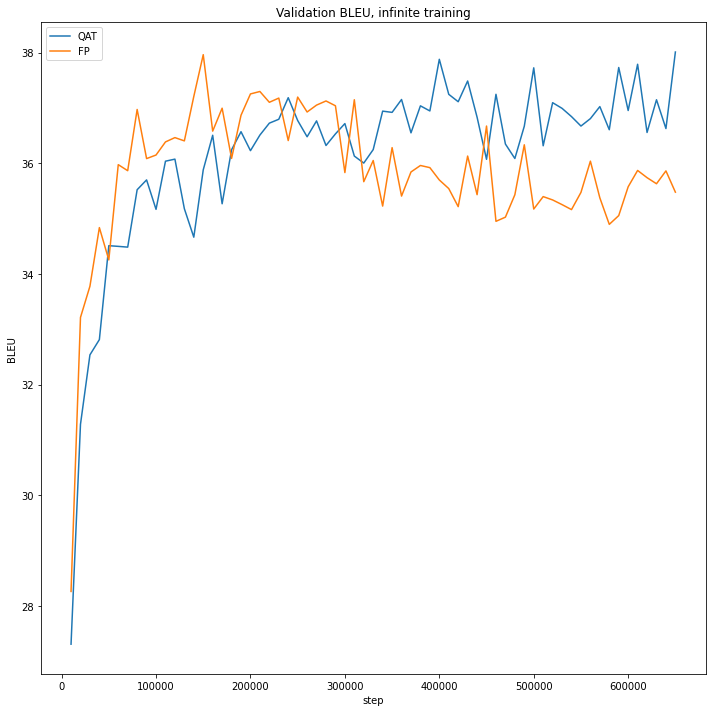

In [234]:
create_frame(ind,"Validation BLEU, infinite training","infinite_train_in-domain_eval_bleu.png")

,step,QAT,FP
0,10000,4.7963,5.2871
1,20000,7.1941,7.7606
2,30000,7.931,7.3408
3,40000,7.7873,8.8288
4,50000,8.7864,8.5091
...,...,...,...
60,610000,10.3089,9.3239
61,620000,9.3268,8.5362
62,630000,9.7811,8.4231
63,640000,9.981,8.0583


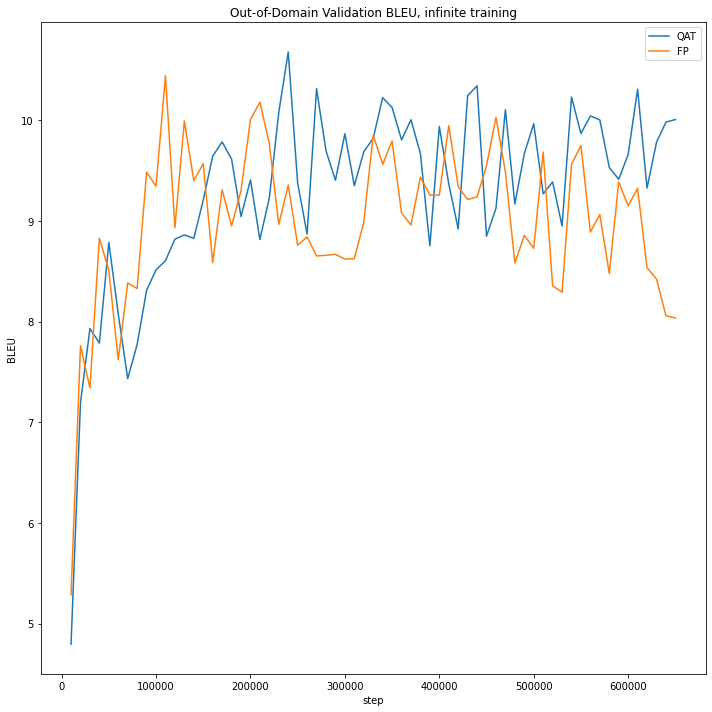

In [235]:
create_frame(outd,"Out-of-Domain Validation BLEU, infinite training","infinite_train_out-domain_eval_bleu.png")

In [236]:
df = pd.read_json("infiniteTrain_in-out_eval_loss.json",orient="values")

In [237]:
df

,x,y,type,name
0,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[1.722022056579589, 1.40396773815155, 1.309202...",scattergl,eval_loss (FP train EuPar...)
1,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[4.548717975616455, 4.160565376281738, 4.08021...",scattergl,trainEuParlFP_OpenSubs_eval_loss (FP train EuP...
2,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[1.764677762985229, 1.445886850357055, 1.35823...",scattergl,eval_loss (QAT train EuPa...)
3,"[10000, 20000, 30000, 40000, 50000, 60000, 700...","[4.614042282104492, 4.175534248352051, 4.07404...",scattergl,trainEuParlQAT_OpenSubs_eval_loss (QAT train E...


In [238]:
ind = df[df.name.str.contains("OpenSubs")==False].reset_index(drop=True)
ind.name = ['FP','QAT']
ind.x[1] = ind.x[1][:len(ind.x[0])]
ind.y[1] = ind.y[1][:len(ind.y[0])]

outd = df[df.name.str.contains("OpenSubs")==True].reset_index(drop=True)
outd.name = ['FP','QAT']
outd.x[1] = outd.x[1][:len(outd.x[0])]
outd.y[1] = outd.y[1][:len(outd.y[0])]

,step,FP,QAT
0,10000,1.722022,1.764678
1,20000,1.403968,1.445887
2,30000,1.309203,1.358238
3,40000,1.247607,1.301646
4,50000,1.202532,1.282226
...,...,...,...
60,610000,1.714321,1.216325
61,620000,1.749264,1.231989
62,630000,1.746535,1.233732
63,640000,1.770278,1.239997


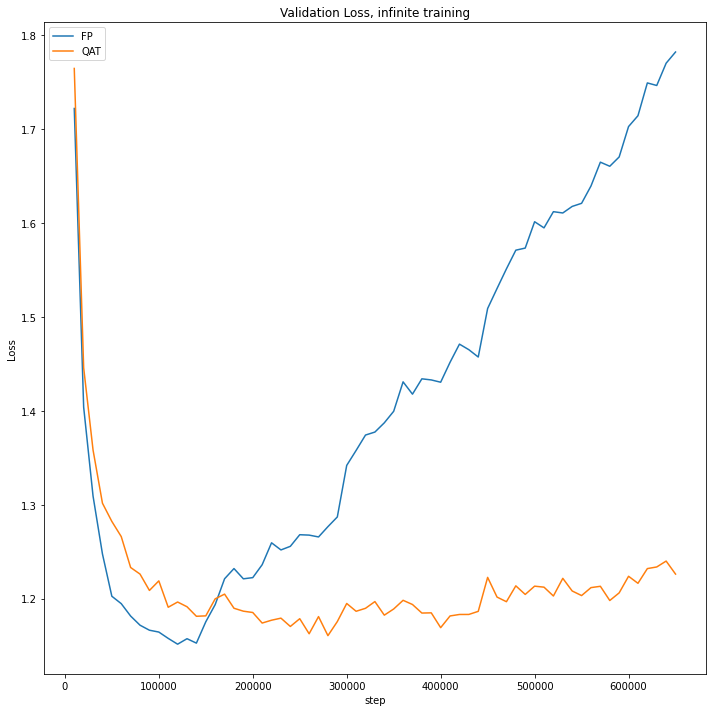

In [239]:
create_frame(ind,"Validation Loss, infinite training","infinite_train_out-domain_eval_loss.png",True)

,step,FP,QAT
0,10000,1.722022,1.764678
1,20000,1.403968,1.445887
2,30000,1.309203,1.358238
3,40000,1.247607,1.301646
4,50000,1.202532,1.282226
...,...,...,...
60,610000,1.714321,1.216325
61,620000,1.749264,1.231989
62,630000,1.746535,1.233732
63,640000,1.770278,1.239997


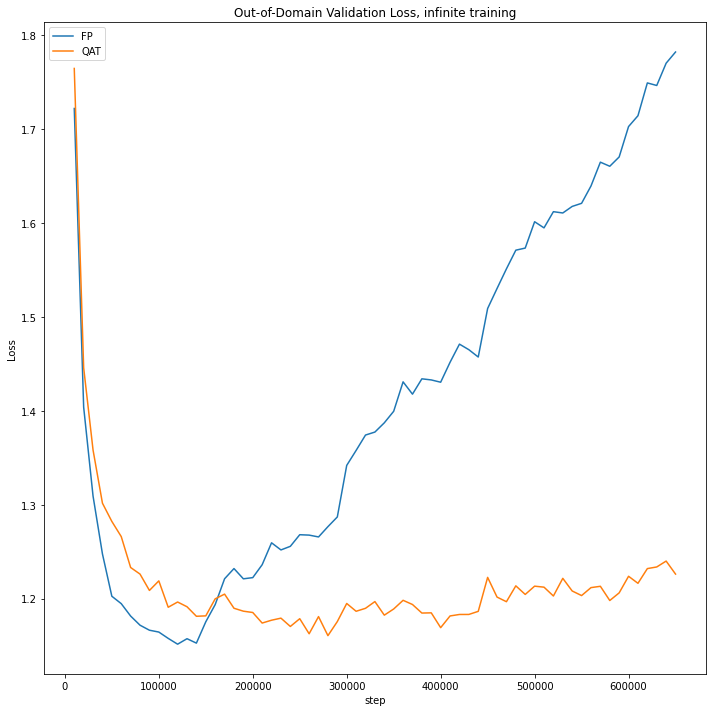

In [240]:
create_frame(ind,"Out-of-Domain Validation Loss, infinite training","infinite_train_out-domain_eval_loss.png",True)